## CodeAlpha Task - 2
## Exploratory Data Analysis (EDA)


# 🚢 Titanic Dataset - Exploratory Data Analysis (EDA)

This project explores the Titanic dataset to uncover patterns related to passenger survival.  
By using Exploratory Data Analysis (EDA), we try to understand how factors like age, gender, and passenger class influenced survival chances.

## 🔍 Questions Explored:

- Did gender influence survival chances?
- Did passenger class affect survival?
- What is the age distribution of passengers?
- Are there any missing values that affect the analysis?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('titanic')
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Mising values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


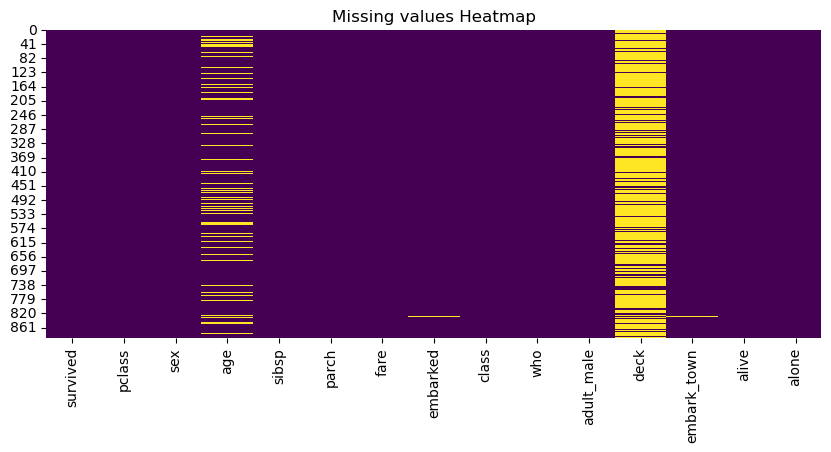

In [8]:
print("Mising values per column:")
print(df.isnull().sum())

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values Heatmap")
plt.show()

df_clean = df.copy()
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean = df_clean.drop(columns=['deck'])

In [10]:
print("Numerical Summary:")
display(df_clean.describe())
print("\n Categorical Summary:")
display(df_clean.describe(include=['object','category']))

Numerical Summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 Categorical Summary:


,sex,embarked,class,who,embark_town,alive
count,891,889,891,891,889,891
unique,2,3,3,3,3,2
top,male,S,Third,man,Southampton,no
freq,577,644,491,537,644,549


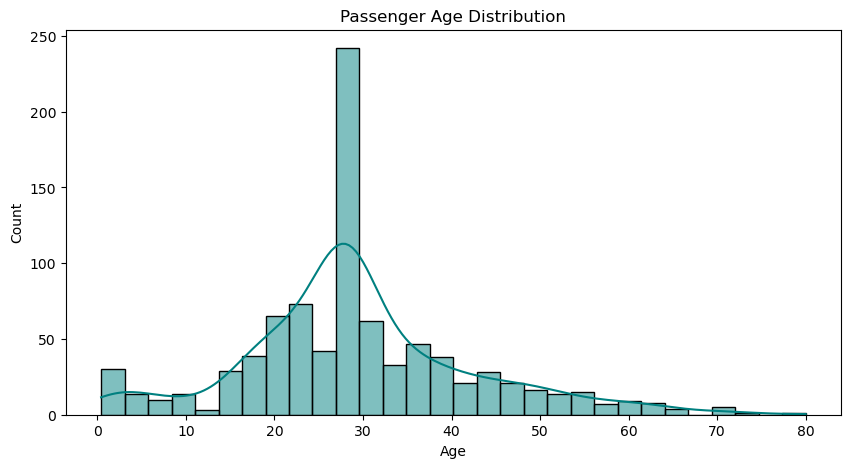

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['age'], bins=30, kde=True, color='teal')
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

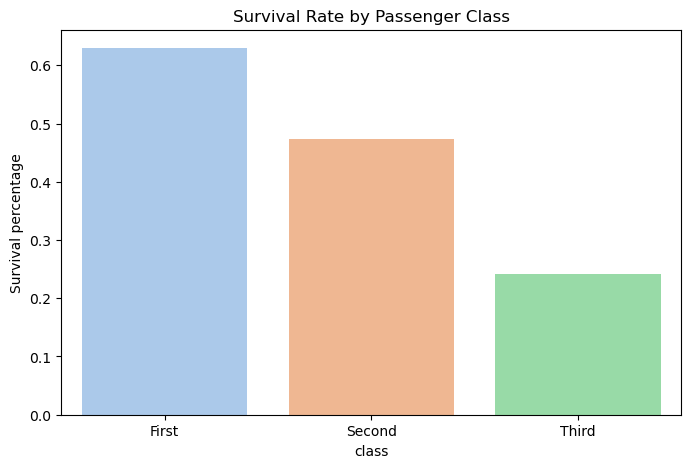

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='class', 
    y='survived', 
    data=df_clean, 
    errorbar=None,
    hue='class',
    palette='pastel',
    legend=False
)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival percentage")
plt.show()

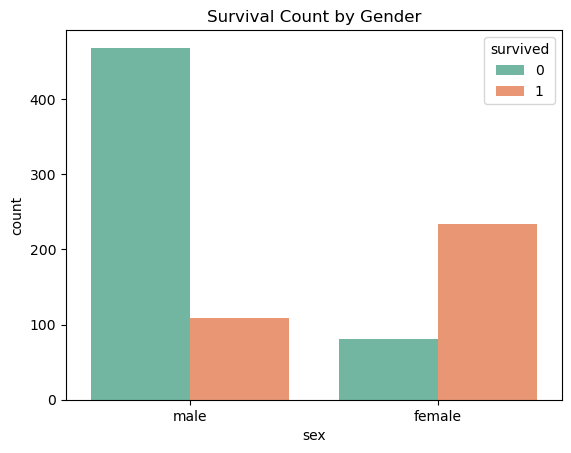

In [23]:
sns.countplot(x='sex', hue='survived', data=df_clean, palette='Set2')
plt.title("Survival Count by Gender")
plt.show()

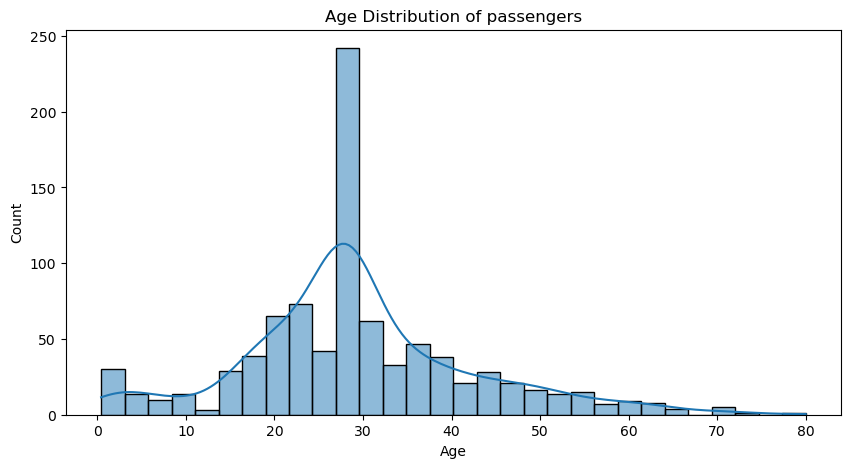

Data and plots saved!


In [18]:
df_clean.to_csv('titanic_cleaned.csv', index=False)
plt.figure(figsize=(10,5))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title('Age Distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Data and plots saved!")

## 📌 Key Insights:

### Demographics:
- **Median age**: 28 years
- **Gender Distribution**: 65% male, 35% female passengers

### Survival:
- **Class Impact**:
  - 1st class passengers had a 63% survival rate
  - 3rd class passengers had only a 24% survival rate
- **Gender Impact**:
  - 74% of females survived, while only 19% of males survived

### Data Quality:
- **Missing Data**:
  - Dropped the 'deck' column (77% missing values)
  - Filled 177 missing 'age' values with the median (28 years)
